In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from scipy.stats import skew
from scipy import stats
from scipy.stats import zscore

In [14]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [15]:
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [16]:
print("First few rows of the Iris dataset:")
print(df.head())

First few rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [17]:
missing_values = df.isnull()
print(missing_values)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                False             False              False             False   
1                False             False              False             False   
2                False             False              False             False   
3                False             False              False             False   
4                False             False              False             False   
..                 ...               ...                ...               ...   
145              False             False              False             False   
146              False             False              False             False   
147              False             False              False             False   
148              False             False              False             False   
149              False             False              False             False   

     target  
0     False  

In [18]:
missing_value = df.isnull().sum()
print(missing_value)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


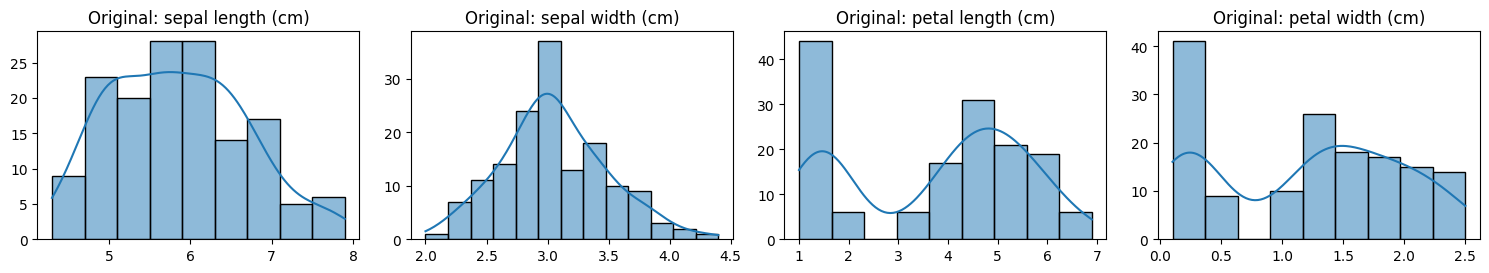

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i + 1)  
    sns.histplot(df[column], kde=True)
    plt.title(f'Original: {column}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [20]:
for column in df.columns:
    if df[column].dtype != 'object': 
        column_skewness = skew(df[column].dropna())
        print(f'{column}: Skewness = {column_skewness}')

sepal length (cm): Skewness = 0.3117530585022963
sepal width (cm): Skewness = 0.31576710633893473
petal length (cm): Skewness = -0.2721276664567214
petal width (cm): Skewness = -0.10193420656560036


C:\Users\197as\AppData\Local\Temp\ipykernel_14252\1976753401.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
C:\Users\197as\AppData\Local\Temp\ipykernel_14252\1976753401.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
C:\Users\197as\AppData\Local\Temp\ipykernel_14252\1976753401.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
C:\Users\197as\AppData\Local\Temp\ipykernel_14252\1976753401.py:

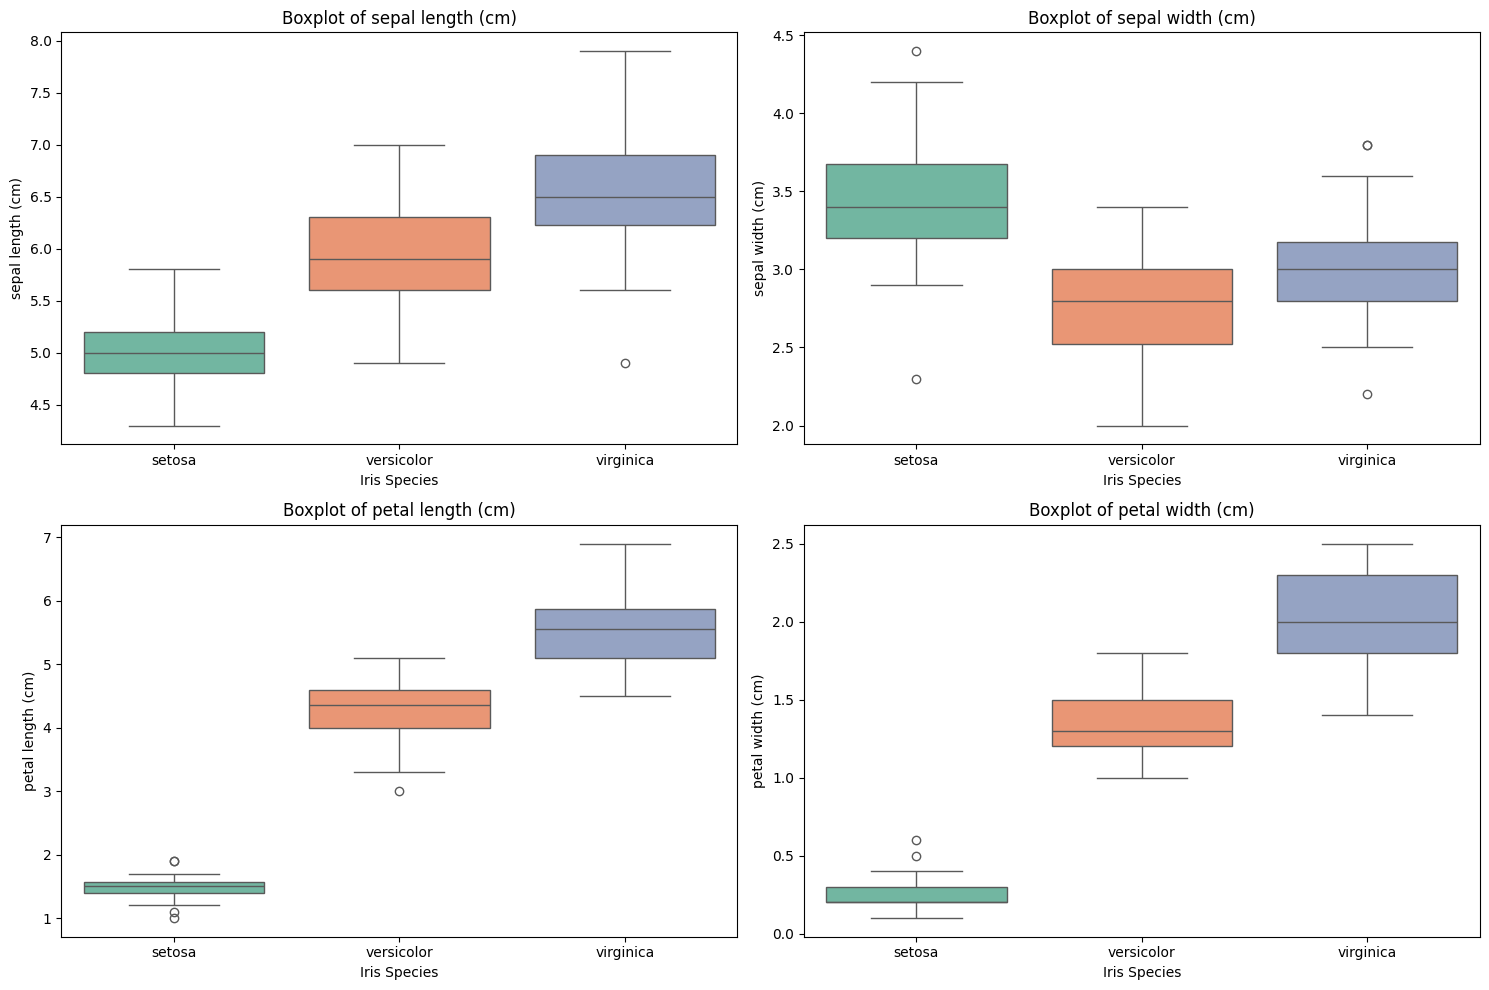

In [21]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target', y=feature, data=df, palette='Set2')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('Iris Species')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [22]:
skewness_threshold = 0.5  

cleaned_df = df.copy()
for column in df.select_dtypes(include=[np.number]).columns:
    skewness = df[column].skew()
    print(f"Feature: {column}, Skewness: {skewness}")
    
    if abs(skewness) > skewness_threshold:  
        print(f"Feature '{column}' is skewed. Applying IQR for outlier removal.")
        
      
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
    else:
        print(f"Feature '{column}' is not skewed. Applying Z-score for outlier removal.")
        z_scores = zscore(cleaned_df[column])
        cleaned_df = cleaned_df[(np.abs(z_scores) < 3)]  

print("Cleaned Dataset:")
print(cleaned_df)


Feature: sepal length (cm), Skewness: 0.3149109566369728
Feature 'sepal length (cm)' is not skewed. Applying Z-score for outlier removal.
Feature: sepal width (cm), Skewness: 0.31896566471359966
Feature 'sepal width (cm)' is not skewed. Applying Z-score for outlier removal.
Feature: petal length (cm), Skewness: -0.27488417975101276
Feature 'petal length (cm)' is not skewed. Applying Z-score for outlier removal.
Feature: petal width (cm), Skewness: -0.10296674764898116
Feature 'petal width (cm)' is not skewed. Applying Z-score for outlier removal.
Cleaned Dataset:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0   

C:\Users\197as\AppData\Local\Temp\ipykernel_14252\3879581656.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=cleaned_df, palette='Set2')
C:\Users\197as\AppData\Local\Temp\ipykernel_14252\3879581656.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=cleaned_df, palette='Set2')
C:\Users\197as\AppData\Local\Temp\ipykernel_14252\3879581656.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=cleaned_df, palette='Set2')
C:\Users\197as\AppData\Local\Temp\ipyker

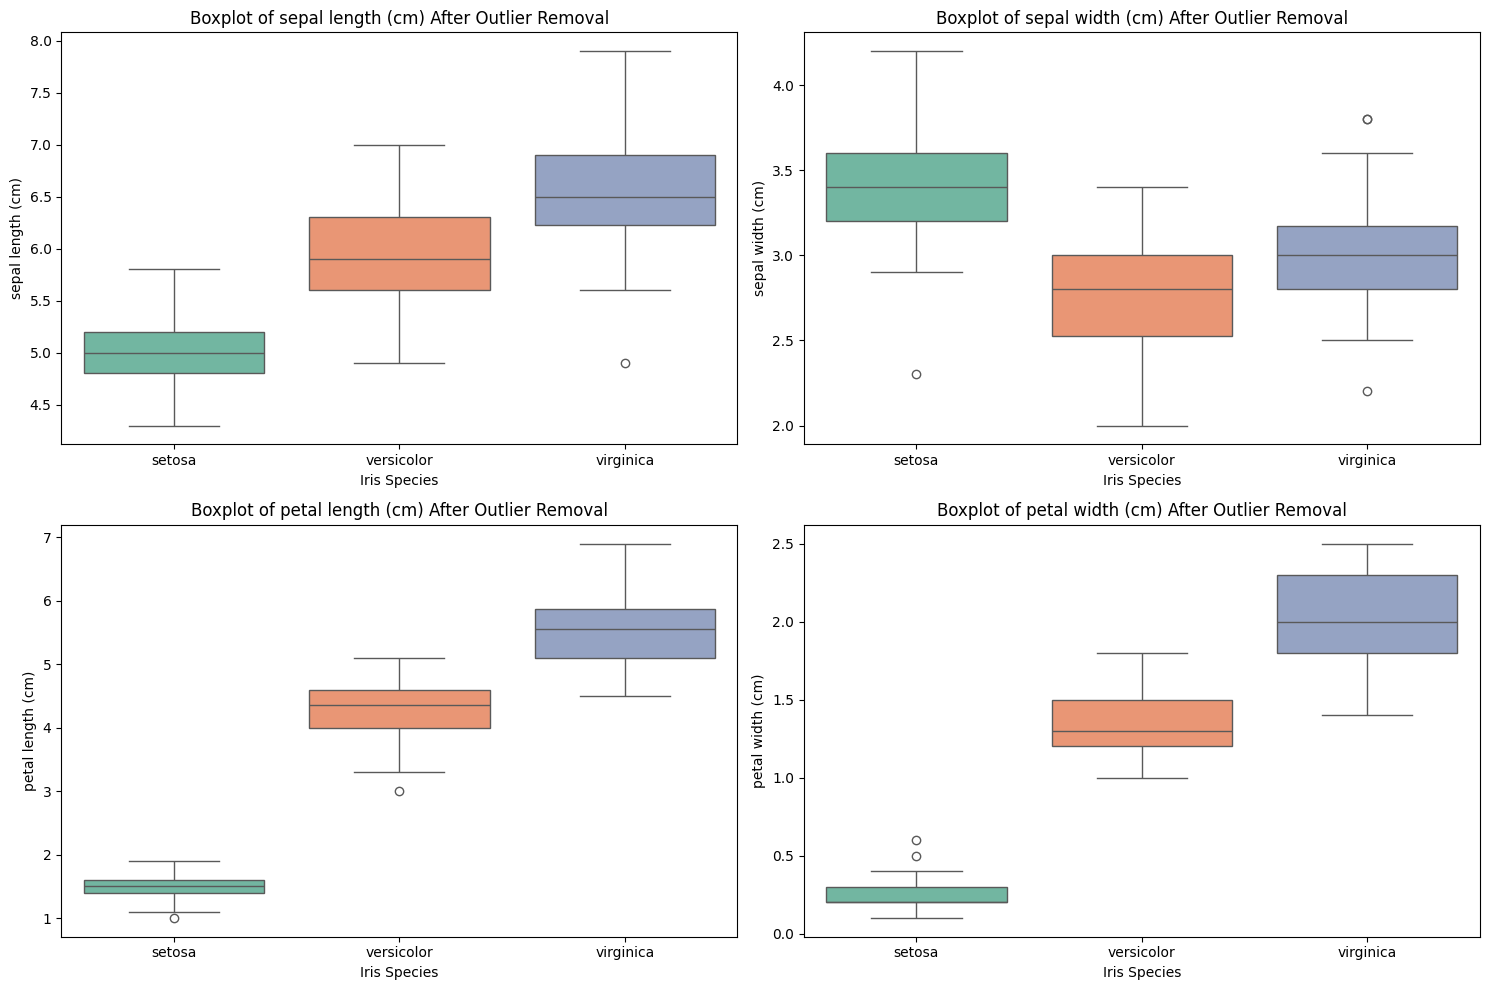

In [23]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target', y=feature, data=cleaned_df, palette='Set2')
    plt.title(f'Boxplot of {feature} After Outlier Removal')
    plt.xlabel('Iris Species')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Split the dataset into training and testing sets

In [24]:
X = cleaned_df.drop('target', axis=1)
y = cleaned_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#  Implement Decision Tree Classifier

In [25]:
decision_tree = DecisionTreeClassifier(random_state=0, criterion='gini',splitter = 'best')
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the Decision Tree model

In [26]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("\nAccuracy of Decision Tree:", accuracy_tree)


Accuracy of Decision Tree: 0.9


# Visualize the Decision Tree

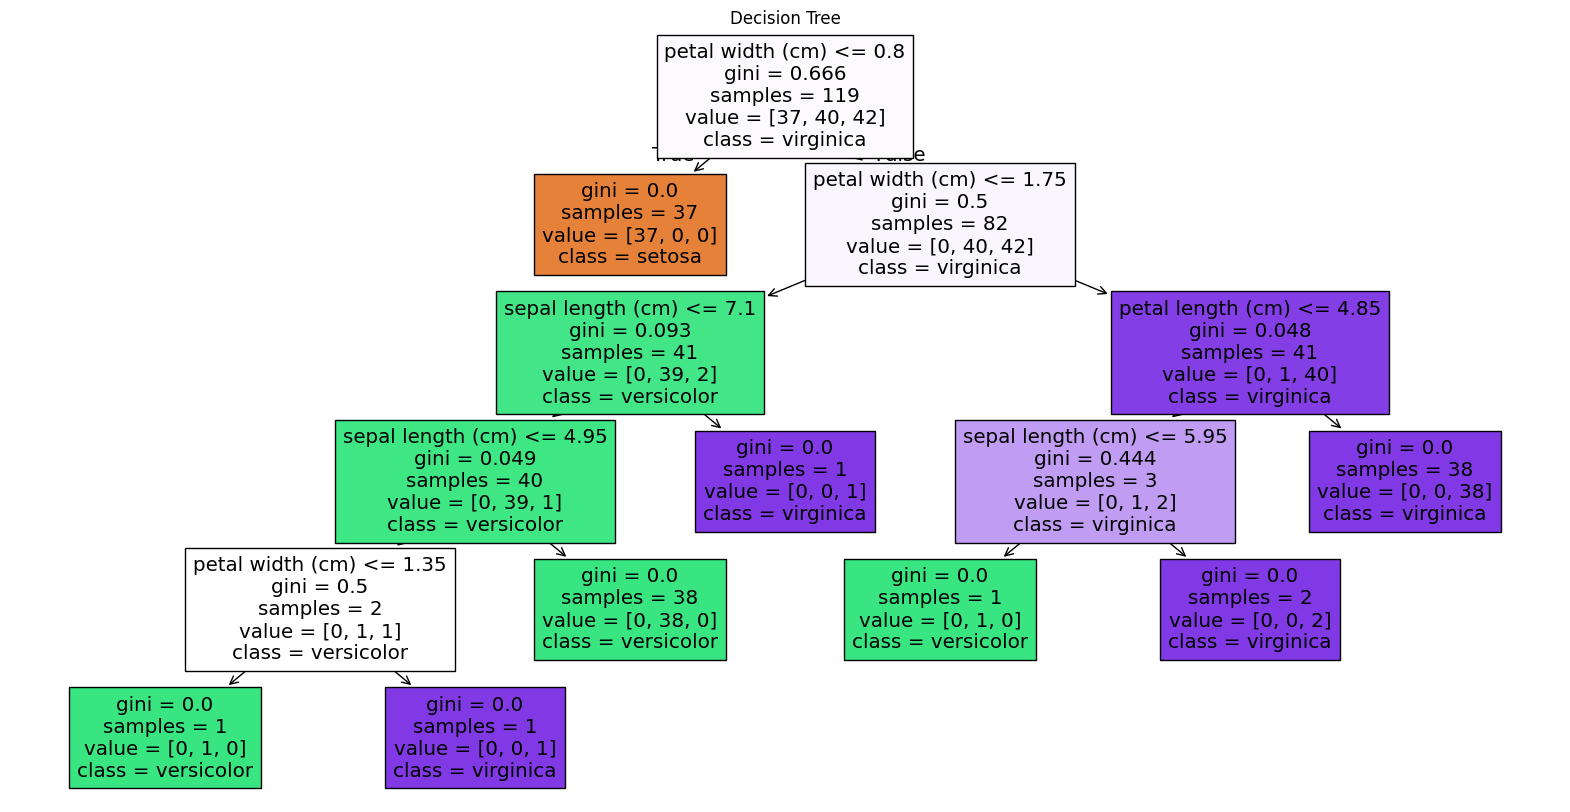

In [27]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree, feature_names=iris.feature_names, class_names=iris.target_names, 
filled=True)
plt.title("Decision Tree")
plt.show()

# Implement Random Forest Classifier

In [28]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)

# Evaluate the Random Forest model

In [29]:
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("\nAccuracy of Random Forest:", accuracy_forest)


Accuracy of Random Forest: 0.9


# Analyze Feature Importance

In [30]:
feature_importances = random_forest.feature_importances_
features = iris.feature_names

# Visualize Feature Importance

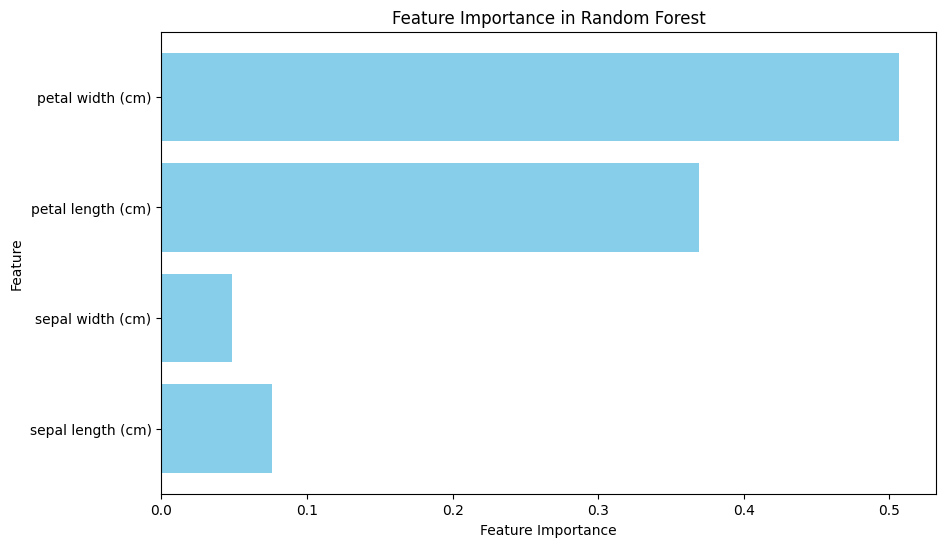

In [31]:
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

# Plot confusion matrices

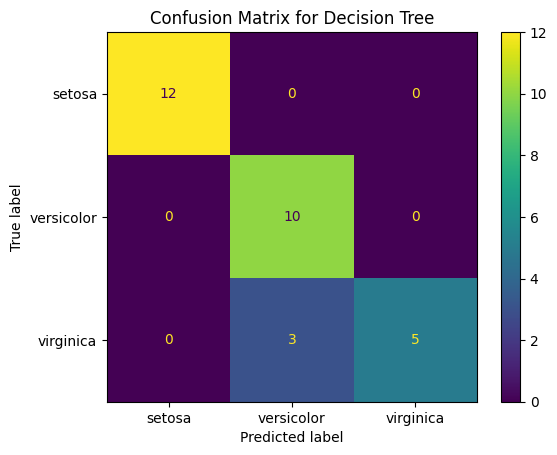

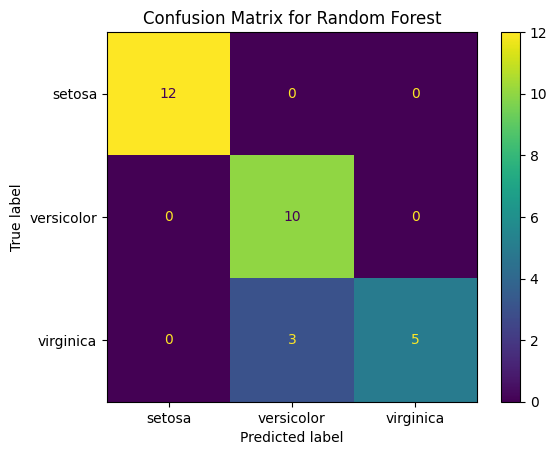

In [32]:
ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test)
plt.title('Confusion Matrix for Decision Tree')
plt.show()
ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test)
plt.title('Confusion Matrix for Random Forest')
plt.show()